In [1]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

filename="./dataset/20201103_v1.csv"
# 데이터 읽어 들이기--- (※1)
#df_pre = pd.read_csv("./dataset/data2018_2_notitle.csv", header=None)
df_pre=pd.read_csv(filename,encoding="cp949", header=0) # CSV파일을 불러오는 함수를 이용
features = len(df_pre.columns)-1

# 데이터 내부의 기호를 숫자로 변환하기--- (※2)
df = df_pre.sample(frac=1)

dataset = df.values
X = dataset[:,0:features]
Y = dataset[:,features]

Using TensorFlow backend.
C:\Users\hiranMain\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hiranMain\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hiranMain\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hiranMain\anaconda3\lib\site-packages\tensorflow\python\fra

In [2]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [3]:
# 학습 전용과 테스트 전용 데이터로 나누기 --- (※3)
#테스트, 검증데이터 분할 7:3 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

#데이터 정규화
X_train, X_test = X_train / 255, X_test / 255

from keras.layers import Dense, Dropout, Activation
# 모델 설정
model = Sequential()
model.add(Dense(28, input_dim=features, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss='mean_squared_error',
           optimizer='adam',
           # metrics=['accuracy'])
           metrics=['accuracy',recall_m,precision_m,f1_m])

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

# 모델 실행 및 저장
history = model.fit(X_train, Y_train, validation_split=0.20, epochs=500, batch_size=100, 
                    callbacks=[early_stopping_callback])



Train on 92728 samples, validate on 23183 samples
Epoch 1/500
92728/92728 [==============================] - 1s 9us/step - loss: 0.2361 - accuracy: 0.6178 - recall_m: 0.6243 - precision_m: 0.5396 - f1_m: 0.5328 - val_loss: 0.2025 - val_accuracy: 0.6645 - val_recall_m: 0.9321 - val_precision_m: 0.6025 - val_f1_m: 0.7303
Epoch 2/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1576 - accuracy: 0.7891 - recall_m: 0.7879 - precision_m: 0.8001 - f1_m: 0.7874 - val_loss: 0.1462 - val_accuracy: 0.7858 - val_recall_m: 0.8113 - val_precision_m: 0.7666 - val_f1_m: 0.7868
Epoch 3/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1392 - accuracy: 0.8066 - recall_m: 0.7736 - precision_m: 0.8335 - f1_m: 0.7988 - val_loss: 0.1404 - val_accuracy: 0.8004 - val_recall_m: 0.8129 - val_precision_m: 0.7879 - val_f1_m: 0.7987
Epoch 4/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1336 - accuracy: 0.8169 - recall_m: 0.7746 - precision_

92728/92728 [==============================] - 1s 8us/step - loss: 0.1207 - accuracy: 0.8354 - recall_m: 0.7886 - precision_m: 0.8718 - f1_m: 0.8258 - val_loss: 0.1265 - val_accuracy: 0.8286 - val_recall_m: 0.8263 - val_precision_m: 0.8258 - val_f1_m: 0.8248
Epoch 31/500
92728/92728 [==============================] - 1s 9us/step - loss: 0.1208 - accuracy: 0.8348 - recall_m: 0.7892 - precision_m: 0.8713 - f1_m: 0.8255 - val_loss: 0.1218 - val_accuracy: 0.8336 - val_recall_m: 0.7610 - val_precision_m: 0.8853 - val_f1_m: 0.8169
Epoch 32/500
92728/92728 [==============================] - 1s 13us/step - loss: 0.1200 - accuracy: 0.8364 - recall_m: 0.7911 - precision_m: 0.8729 - f1_m: 0.8276 - val_loss: 0.1210 - val_accuracy: 0.8335 - val_recall_m: 0.7900 - val_precision_m: 0.8607 - val_f1_m: 0.8223
Epoch 33/500
92728/92728 [==============================] - 1s 9us/step - loss: 0.1200 - accuracy: 0.8361 - recall_m: 0.7913 - precision_m: 0.8724 - f1_m: 0.8272 - val_loss: 0.1223 - val_accuracy:

Epoch 60/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1161 - accuracy: 0.8420 - recall_m: 0.8044 - precision_m: 0.8729 - f1_m: 0.8346 - val_loss: 0.1178 - val_accuracy: 0.8388 - val_recall_m: 0.7769 - val_precision_m: 0.8822 - val_f1_m: 0.8246
Epoch 61/500
92728/92728 [==============================] - 1s 9us/step - loss: 0.1151 - accuracy: 0.8433 - recall_m: 0.8060 - precision_m: 0.8727 - f1_m: 0.8359 - val_loss: 0.1210 - val_accuracy: 0.8361 - val_recall_m: 0.8052 - val_precision_m: 0.8539 - val_f1_m: 0.8273
Epoch 62/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1157 - accuracy: 0.8421 - recall_m: 0.8048 - precision_m: 0.8723 - f1_m: 0.8346 - val_loss: 0.1161 - val_accuracy: 0.8401 - val_recall_m: 0.8046 - val_precision_m: 0.8621 - val_f1_m: 0.8309
Epoch 63/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1155 - accuracy: 0.8430 - recall_m: 0.8054 - precision_m: 0.8732 - f1_m: 0.8353 - val_loss: 0.1174 - v

92728/92728 [==============================] - 1s 8us/step - loss: 0.1132 - accuracy: 0.8446 - recall_m: 0.8091 - precision_m: 0.8735 - f1_m: 0.8377 - val_loss: 0.1186 - val_accuracy: 0.8367 - val_recall_m: 0.8521 - val_precision_m: 0.8233 - val_f1_m: 0.8360
Epoch 91/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1129 - accuracy: 0.8458 - recall_m: 0.8106 - precision_m: 0.8733 - f1_m: 0.8385 - val_loss: 0.1146 - val_accuracy: 0.8408 - val_recall_m: 0.7818 - val_precision_m: 0.8820 - val_f1_m: 0.8273
Epoch 92/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1130 - accuracy: 0.8457 - recall_m: 0.8115 - precision_m: 0.8730 - f1_m: 0.8388 - val_loss: 0.1142 - val_accuracy: 0.8422 - val_recall_m: 0.8052 - val_precision_m: 0.8659 - val_f1_m: 0.8330
Epoch 93/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1129 - accuracy: 0.8455 - recall_m: 0.8099 - precision_m: 0.8737 - f1_m: 0.8382 - val_loss: 0.1186 - val_accuracy: 

92728/92728 [==============================] - 1s 8us/step - loss: 0.1119 - accuracy: 0.8470 - recall_m: 0.8121 - precision_m: 0.8748 - f1_m: 0.8404 - val_loss: 0.1149 - val_accuracy: 0.8409 - val_recall_m: 0.8368 - val_precision_m: 0.8402 - val_f1_m: 0.8370
Epoch 121/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1124 - accuracy: 0.8460 - recall_m: 0.8113 - precision_m: 0.8742 - f1_m: 0.8392 - val_loss: 0.1150 - val_accuracy: 0.8416 - val_recall_m: 0.8366 - val_precision_m: 0.8415 - val_f1_m: 0.8376
Epoch 122/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1122 - accuracy: 0.8471 - recall_m: 0.8140 - precision_m: 0.8744 - f1_m: 0.8408 - val_loss: 0.1148 - val_accuracy: 0.8425 - val_recall_m: 0.8380 - val_precision_m: 0.8421 - val_f1_m: 0.8386
Epoch 123/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1116 - accuracy: 0.8470 - recall_m: 0.8125 - precision_m: 0.8745 - f1_m: 0.8403 - val_loss: 0.1135 - val_accurac

92728/92728 [==============================] - 1s 8us/step - loss: 0.1116 - accuracy: 0.8477 - recall_m: 0.8139 - precision_m: 0.8752 - f1_m: 0.8412 - val_loss: 0.1157 - val_accuracy: 0.8404 - val_recall_m: 0.8455 - val_precision_m: 0.8336 - val_f1_m: 0.8380
Epoch 151/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1120 - accuracy: 0.8461 - recall_m: 0.8121 - precision_m: 0.8741 - f1_m: 0.8394 - val_loss: 0.1141 - val_accuracy: 0.8432 - val_recall_m: 0.8223 - val_precision_m: 0.8545 - val_f1_m: 0.8366
Epoch 152/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1114 - accuracy: 0.8473 - recall_m: 0.8135 - precision_m: 0.8737 - f1_m: 0.8406 - val_loss: 0.1155 - val_accuracy: 0.8415 - val_recall_m: 0.8345 - val_precision_m: 0.8426 - val_f1_m: 0.8370
Epoch 153/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1114 - accuracy: 0.8470 - recall_m: 0.8129 - precision_m: 0.8738 - f1_m: 0.8402 - val_loss: 0.1139 - val_accurac

92728/92728 [==============================] - 1s 8us/step - loss: 0.1109 - accuracy: 0.8476 - recall_m: 0.8123 - precision_m: 0.8753 - f1_m: 0.8407 - val_loss: 0.1178 - val_accuracy: 0.8371 - val_recall_m: 0.7594 - val_precision_m: 0.8942 - val_f1_m: 0.8198
Epoch 181/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1110 - accuracy: 0.8480 - recall_m: 0.8134 - precision_m: 0.8759 - f1_m: 0.8414 - val_loss: 0.1151 - val_accuracy: 0.8423 - val_recall_m: 0.8354 - val_precision_m: 0.8437 - val_f1_m: 0.8379
Epoch 182/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1111 - accuracy: 0.8482 - recall_m: 0.8149 - precision_m: 0.8749 - f1_m: 0.8417 - val_loss: 0.1136 - val_accuracy: 0.8420 - val_recall_m: 0.7806 - val_precision_m: 0.8858 - val_f1_m: 0.8282
Epoch 183/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1113 - accuracy: 0.8468 - recall_m: 0.8126 - precision_m: 0.8743 - f1_m: 0.8402 - val_loss: 0.1159 - val_accurac

Epoch 210/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1111 - accuracy: 0.8479 - recall_m: 0.8139 - precision_m: 0.8753 - f1_m: 0.8411 - val_loss: 0.1138 - val_accuracy: 0.8410 - val_recall_m: 0.7747 - val_precision_m: 0.8893 - val_f1_m: 0.8264
Epoch 211/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1107 - accuracy: 0.8476 - recall_m: 0.8123 - precision_m: 0.8754 - f1_m: 0.8407 - val_loss: 0.1126 - val_accuracy: 0.8443 - val_recall_m: 0.8058 - val_precision_m: 0.8695 - val_f1_m: 0.8350
Epoch 212/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1106 - accuracy: 0.8483 - recall_m: 0.8151 - precision_m: 0.8751 - f1_m: 0.8419 - val_loss: 0.1131 - val_accuracy: 0.8437 - val_recall_m: 0.8030 - val_precision_m: 0.8705 - val_f1_m: 0.8339
Epoch 213/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1108 - accuracy: 0.8482 - recall_m: 0.8147 - precision_m: 0.8748 - f1_m: 0.8415 - val_loss: 0.1125

92728/92728 [==============================] - 1s 8us/step - loss: 0.1107 - accuracy: 0.8480 - recall_m: 0.8139 - precision_m: 0.8756 - f1_m: 0.8414 - val_loss: 0.1120 - val_accuracy: 0.8451 - val_recall_m: 0.8118 - val_precision_m: 0.8663 - val_f1_m: 0.8367
Epoch 241/500
92728/92728 [==============================] - 1s 9us/step - loss: 0.1106 - accuracy: 0.8479 - recall_m: 0.8145 - precision_m: 0.8748 - f1_m: 0.8415 - val_loss: 0.1128 - val_accuracy: 0.8435 - val_recall_m: 0.7946 - val_precision_m: 0.8774 - val_f1_m: 0.8323
Epoch 242/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1103 - accuracy: 0.8497 - recall_m: 0.8158 - precision_m: 0.8770 - f1_m: 0.8433 - val_loss: 0.1137 - val_accuracy: 0.8446 - val_recall_m: 0.8244 - val_precision_m: 0.8557 - val_f1_m: 0.8383
Epoch 243/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1107 - accuracy: 0.8477 - recall_m: 0.8136 - precision_m: 0.8748 - f1_m: 0.8409 - val_loss: 0.1119 - val_accurac

92728/92728 [==============================] - 1s 8us/step - loss: 0.1104 - accuracy: 0.8486 - recall_m: 0.8151 - precision_m: 0.8754 - f1_m: 0.8422 - val_loss: 0.1135 - val_accuracy: 0.8443 - val_recall_m: 0.8388 - val_precision_m: 0.8450 - val_f1_m: 0.8404
Epoch 271/500
92728/92728 [==============================] - 1s 9us/step - loss: 0.1100 - accuracy: 0.8494 - recall_m: 0.8151 - precision_m: 0.8764 - f1_m: 0.8426 - val_loss: 0.1146 - val_accuracy: 0.8418 - val_recall_m: 0.8451 - val_precision_m: 0.8362 - val_f1_m: 0.8391
Epoch 272/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1102 - accuracy: 0.8484 - recall_m: 0.8144 - precision_m: 0.8755 - f1_m: 0.8419 - val_loss: 0.1190 - val_accuracy: 0.8365 - val_recall_m: 0.8710 - val_precision_m: 0.8117 - val_f1_m: 0.8389
Epoch 273/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1104 - accuracy: 0.8483 - recall_m: 0.8149 - precision_m: 0.8751 - f1_m: 0.8417 - val_loss: 0.1129 - val_accurac

92728/92728 [==============================] - 1s 8us/step - loss: 0.1099 - accuracy: 0.8490 - recall_m: 0.8155 - precision_m: 0.8754 - f1_m: 0.8427 - val_loss: 0.1138 - val_accuracy: 0.8434 - val_recall_m: 0.8458 - val_precision_m: 0.8388 - val_f1_m: 0.8408
Epoch 301/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1101 - accuracy: 0.8489 - recall_m: 0.8148 - precision_m: 0.8762 - f1_m: 0.8422 - val_loss: 0.1117 - val_accuracy: 0.8459 - val_recall_m: 0.8085 - val_precision_m: 0.8705 - val_f1_m: 0.8368
Epoch 302/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1102 - accuracy: 0.8487 - recall_m: 0.8145 - precision_m: 0.8764 - f1_m: 0.8422 - val_loss: 0.1155 - val_accuracy: 0.8416 - val_recall_m: 0.8506 - val_precision_m: 0.8323 - val_f1_m: 0.8399
Epoch 303/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1103 - accuracy: 0.8486 - recall_m: 0.8141 - precision_m: 0.8763 - f1_m: 0.8417 - val_loss: 0.1133 - val_accurac

92728/92728 [==============================] - 1s 8us/step - loss: 0.1096 - accuracy: 0.8488 - recall_m: 0.8164 - precision_m: 0.8753 - f1_m: 0.8429 - val_loss: 0.1114 - val_accuracy: 0.8459 - val_recall_m: 0.8156 - val_precision_m: 0.8647 - val_f1_m: 0.8380
Epoch 331/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1098 - accuracy: 0.8489 - recall_m: 0.8159 - precision_m: 0.8747 - f1_m: 0.8423 - val_loss: 0.1121 - val_accuracy: 0.8447 - val_recall_m: 0.7987 - val_precision_m: 0.8760 - val_f1_m: 0.8340
Epoch 332/500
92728/92728 [==============================] - 1s 9us/step - loss: 0.1095 - accuracy: 0.8487 - recall_m: 0.8153 - precision_m: 0.8749 - f1_m: 0.8422 - val_loss: 0.1110 - val_accuracy: 0.8462 - val_recall_m: 0.8117 - val_precision_m: 0.8684 - val_f1_m: 0.8376
Epoch 333/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1097 - accuracy: 0.8487 - recall_m: 0.8153 - precision_m: 0.8756 - f1_m: 0.8423 - val_loss: 0.1117 - val_accurac

92728/92728 [==============================] - 1s 8us/step - loss: 0.1094 - accuracy: 0.8494 - recall_m: 0.8189 - precision_m: 0.8744 - f1_m: 0.8437 - val_loss: 0.1118 - val_accuracy: 0.8453 - val_recall_m: 0.8103 - val_precision_m: 0.8678 - val_f1_m: 0.8365
Epoch 361/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1094 - accuracy: 0.8495 - recall_m: 0.8174 - precision_m: 0.8748 - f1_m: 0.8432 - val_loss: 0.1131 - val_accuracy: 0.8448 - val_recall_m: 0.8137 - val_precision_m: 0.8642 - val_f1_m: 0.8367
Epoch 362/500
92728/92728 [==============================] - 1s 9us/step - loss: 0.1095 - accuracy: 0.8487 - recall_m: 0.8167 - precision_m: 0.8739 - f1_m: 0.8424 - val_loss: 0.1111 - val_accuracy: 0.8457 - val_recall_m: 0.7995 - val_precision_m: 0.8773 - val_f1_m: 0.8350
Epoch 363/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1093 - accuracy: 0.8494 - recall_m: 0.8185 - precision_m: 0.8741 - f1_m: 0.8434 - val_loss: 0.1119 - val_accurac

92728/92728 [==============================] - 1s 8us/step - loss: 0.1091 - accuracy: 0.8499 - recall_m: 0.8187 - precision_m: 0.8743 - f1_m: 0.8438 - val_loss: 0.1112 - val_accuracy: 0.8466 - val_recall_m: 0.8305 - val_precision_m: 0.8549 - val_f1_m: 0.8411
Epoch 391/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1092 - accuracy: 0.8496 - recall_m: 0.8199 - precision_m: 0.8730 - f1_m: 0.8439 - val_loss: 0.1112 - val_accuracy: 0.8456 - val_recall_m: 0.8170 - val_precision_m: 0.8632 - val_f1_m: 0.8380
Epoch 392/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1090 - accuracy: 0.8499 - recall_m: 0.8197 - precision_m: 0.8740 - f1_m: 0.8443 - val_loss: 0.1115 - val_accuracy: 0.8472 - val_recall_m: 0.8249 - val_precision_m: 0.8598 - val_f1_m: 0.8405
Epoch 393/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1095 - accuracy: 0.8489 - recall_m: 0.8182 - precision_m: 0.8735 - f1_m: 0.8430 - val_loss: 0.1120 - val_accurac

92728/92728 [==============================] - 1s 8us/step - loss: 0.1093 - accuracy: 0.8490 - recall_m: 0.8188 - precision_m: 0.8729 - f1_m: 0.8430 - val_loss: 0.1117 - val_accuracy: 0.8456 - val_recall_m: 0.8064 - val_precision_m: 0.8716 - val_f1_m: 0.8362
Epoch 421/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1090 - accuracy: 0.8499 - recall_m: 0.8181 - precision_m: 0.8744 - f1_m: 0.8436 - val_loss: 0.1115 - val_accuracy: 0.8458 - val_recall_m: 0.8062 - val_precision_m: 0.8721 - val_f1_m: 0.8363
Epoch 422/500
92728/92728 [==============================] - 1s 9us/step - loss: 0.1094 - accuracy: 0.8494 - recall_m: 0.8188 - precision_m: 0.8738 - f1_m: 0.8434 - val_loss: 0.1130 - val_accuracy: 0.8443 - val_recall_m: 0.8393 - val_precision_m: 0.8446 - val_f1_m: 0.8404
Epoch 423/500
92728/92728 [==============================] - 1s 9us/step - loss: 0.1095 - accuracy: 0.8485 - recall_m: 0.8182 - precision_m: 0.8731 - f1_m: 0.8427 - val_loss: 0.1138 - val_accurac

92728/92728 [==============================] - 1s 8us/step - loss: 0.1088 - accuracy: 0.8507 - recall_m: 0.8213 - precision_m: 0.8737 - f1_m: 0.8448 - val_loss: 0.1133 - val_accuracy: 0.8406 - val_recall_m: 0.7819 - val_precision_m: 0.8816 - val_f1_m: 0.8272
Epoch 451/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1094 - accuracy: 0.8493 - recall_m: 0.8193 - precision_m: 0.8731 - f1_m: 0.8434 - val_loss: 0.1120 - val_accuracy: 0.8435 - val_recall_m: 0.7855 - val_precision_m: 0.8852 - val_f1_m: 0.8307
Epoch 452/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1090 - accuracy: 0.8495 - recall_m: 0.8188 - precision_m: 0.8742 - f1_m: 0.8436 - val_loss: 0.1110 - val_accuracy: 0.8458 - val_recall_m: 0.8103 - val_precision_m: 0.8688 - val_f1_m: 0.8370
Epoch 453/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1091 - accuracy: 0.8492 - recall_m: 0.8182 - precision_m: 0.8742 - f1_m: 0.8432 - val_loss: 0.1168 - val_accurac

92728/92728 [==============================] - 1s 9us/step - loss: 0.1090 - accuracy: 0.8495 - recall_m: 0.8188 - precision_m: 0.8739 - f1_m: 0.8436 - val_loss: 0.1110 - val_accuracy: 0.8459 - val_recall_m: 0.8219 - val_precision_m: 0.8600 - val_f1_m: 0.8390
Epoch 481/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1092 - accuracy: 0.8492 - recall_m: 0.8187 - precision_m: 0.8727 - f1_m: 0.8430 - val_loss: 0.1119 - val_accuracy: 0.8452 - val_recall_m: 0.8184 - val_precision_m: 0.8610 - val_f1_m: 0.8376
Epoch 482/500
92728/92728 [==============================] - 1s 8us/step - loss: 0.1091 - accuracy: 0.8497 - recall_m: 0.8183 - precision_m: 0.8750 - f1_m: 0.8437 - val_loss: 0.1116 - val_accuracy: 0.8454 - val_recall_m: 0.7985 - val_precision_m: 0.8775 - val_f1_m: 0.8346
Epoch 483/500
92728/92728 [==============================] - 1s 9us/step - loss: 0.1093 - accuracy: 0.8490 - recall_m: 0.8190 - precision_m: 0.8727 - f1_m: 0.8429 - val_loss: 0.1107 - val_accurac

In [4]:
evaluateResult= model.evaluate(X_test, Y_test)   #X_test 으로 검증

loss = evaluateResult[0]
accuracy = evaluateResult[1]
recall  = evaluateResult[2]
precision  = evaluateResult[3]
f1_socre  = evaluateResult[4]

# 결과 출력\
print('Accuracy of DNN Model: %.2f' % accuracy)
print("\n precision, recall, f1_score")
print("\n  %.4f, %4f, %.4f" % (precision ,recall, f1_socre))

49677/49677 [==============================] - 0s 10us/step
Accuracy of DNN Model: 0.85

 precision, recall, f1_score

  0.8595, 0.847719, 0.8493


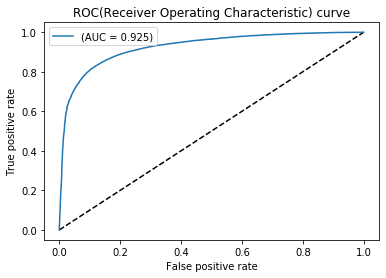

In [6]:
from sklearn.metrics import roc_curve

probs = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, probs)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='(AUC = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC(Receiver Operating Characteristic) curve')
plt.legend(loc='best')
plt.show()
